# Kaggle-房价预测

## step1 检视数据源

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_tra = pd.read_csv("input/train.csv", index_col=0)
data_tes = pd.read_csv("input/test.csv", index_col=0)

In [3]:
data_tra.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## step2 合并数据（为了处理数据时更加方便，还要把训练集中的label值分离出来）

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEF129F550>,
      dtype=object)

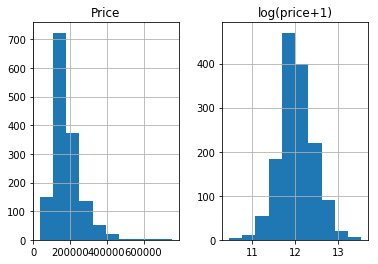

In [4]:
#首先，看一下标签值是否平滑，是否满足一个标准分布
%matplotlib inline
prices = pd.DataFrame({"Price":data_tra["SalePrice"], "log(price+1)":np.log1p(data_tra["SalePrice"])})
prices.hist()

In [5]:
y_train = np.log1p(data_tra.pop("SalePrice"))

In [6]:
#合并数据集
data_all = pd.concat((data_tra, data_tes), axis=0)

## step3 变量转化

### category数据转换成numerical

In [7]:
#MSSubClass是一个category，数字意义不大，需要转换成string
data_all["MSSubClass"] = data_all["MSSubClass"].astype(str)
data_all["MSSubClass"].value_counts()
#对字符串进行One-hot编码
pd.get_dummies(data_all["MSSubClass"], prefix="MSSubClass").head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [8]:
#因为category都是字符串类型的，所以要将字符串类型的category进行One-hot编码
data_all_dummy = pd.get_dummies(data_all)

In [9]:
data_all_dummy.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


### numerical数据的处理

In [10]:
data_all_dummy.isnull().sum().sort_values(ascending=False).head(12)

LotFrontage          486
GarageYrBlt          159
MasVnrArea            23
BsmtHalfBath           2
BsmtFullBath           2
BsmtFinSF2             1
GarageCars             1
TotalBsmtSF            1
BsmtUnfSF              1
GarageArea             1
BsmtFinSF1             1
Condition1_Artery      0
dtype: int64

In [11]:
mean_cols = data_all_dummy.mean()
mean_cols.head(12)

LotFrontage        69.305795
LotArea         10168.114080
OverallQual         6.089072
OverallCond         5.564577
YearBuilt        1971.312778
YearRemodAdd     1984.264474
MasVnrArea        102.201312
BsmtFinSF1        441.423235
BsmtFinSF2         49.582248
BsmtUnfSF         560.772104
TotalBsmtSF      1051.777587
1stFlrSF         1159.581706
dtype: float64

In [12]:
data_all_dummy = data_all_dummy.fillna(mean_cols)

In [13]:
data_all_dummy.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,...,0.002741,0.081877,0.002398,0.865022,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933
std,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.532750,169.176615,439.468337,...,0.052289,0.274225,0.048920,0.341758,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,0.000000,467.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 标准化所有的numerical数据(x-x')/s,在这里，不需要把One-hot的那些数据标准化，目标是那些本来就是numerical的数据

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
#找到所有的numerical数据
numerical_cols = data_all.columns[data_all.dtypes !="object"]
numerical_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [18]:
numerical_means = data_all_dummy.loc[:, numerical_cols].mean()
numerical_std = data_all_dummy.loc[:, numerical_cols].std()
data_all_dummy.loc[:, numerical_cols] = (data_all_dummy.loc[:, numerical_cols]-numerical_means)/numerical_std

In [19]:
data_all_dummy.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.238851,-0.058339,-0.405244,-0.398335,0.077596,-0.241973,-0.215070,-0.222119,-0.200343,-0.081305,...,0,0,0,1,0,0,0,0,1,0
2,-0.186298,-0.060928,-0.692984,2.032037,-0.800143,-1.042991,-0.199736,0.130060,-0.200343,-0.389152,...,0,0,0,1,0,0,0,0,1,0
3,-0.248084,-0.060093,-0.405244,-0.398335,-0.032108,-0.345305,-0.263696,-0.332039,-0.200343,-0.591413,...,0,0,0,1,0,0,0,0,1,0
4,-0.201526,-0.060870,-0.405244,-0.398335,2.014349,-0.660007,-0.199736,-0.253125,-0.200343,-0.643671,...,0,0,0,1,1,0,0,0,0,0
5,-0.130603,-0.044755,0.582714,-0.398335,-0.084279,-0.534971,0.274752,-0.261530,-0.200343,-0.628377,...,0,0,0,1,0,0,0,0,1,0


## step4 建立模型

In [25]:
#数据集划分
x_train = data_all_dummy.loc[data_tra.index].values
x_test = data_all_dummy.loc[data_tes.index].values

#### Ridge Regression

In [35]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [32]:
#用cross vaildation方法来测试模型,存下所有的CV值，看看哪个alpha效果更好
alphas = np.logspace(-3, 2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=10, scoring="neg_mean_squared_error"))
    test_scores.append(np.mean(test_score))

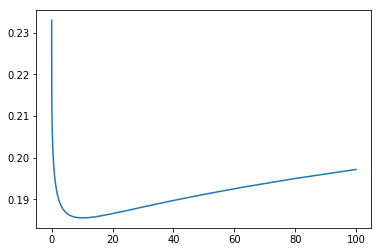

In [33]:
%matplotlib inline
plt.plot(alphas, test_scores)

### Random Forest

In [37]:
max_features = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, x_train, y_train, cv=5, scoring="neg_mean_squared_error"))
    test_scores.append(np.mean(test_score))

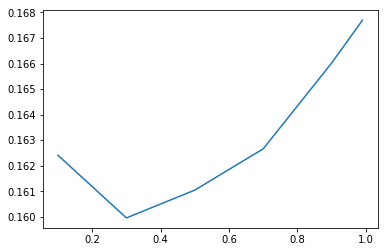

In [38]:
plt.plot(max_features, test_scores)

## step 5 Ensemble
#### 汲取两种或多种模型的优点，把最好的参数拿出来，做成我们的最终模型

In [39]:
#ridge回归训练
ridge = Ridge(alpha=15)
ridge.fit(x_train, y_train)

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
#RandomForest训练
rf = RandomForestRegressor(n_estimators=500, max_features=0.3)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.3, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#### 因为最前面我们把label值log(1+x)了，于是这里我们要把预测值exp回去，用expm1()函数

In [46]:
y_ridge = np.expm1(ridge.predict(x_test))
y_rf= np.expm1(rf.predict(x_test))

#### 一个正经的ensemble是把这群model预测的预测结果作为新的input，再做一次预测，这里用简单方法，直接平均化

In [47]:
y_final = (y_ridge + y_rf) / 2

## step6 提交结果

In [53]:
submission_df = pd.DataFrame(data={"Id" : data_tes.index, "SalePrice" : y_final})

In [54]:
submission_df.head()

,Id,SalePrice
0,1461,116679.941954
1,1462,150720.987423
2,1463,176293.174518
3,1464,189365.173195
4,1465,188568.912643


In [55]:
submission_df.to_csv("sample_submission.csv", index=0)